Looking at data colleted from the 24th of July from WM1 e m506 (normal mounted) 

In [ ]:
#TODO check the TRS compass and consider to rotate

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from wind_tools import *
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib
#matplotlib.use('Qt5Agg')

import matplotlib.pyplot as plt
sns.set()
import plotly.express as px

matplotlib.rcParams['figure.figsize'] = (16,10)

## Load data

In [ ]:
proc_dir = Path("2020_data/data_20200724_final_field_install/processed")

wm1_path = proc_dir / "eddypro_WM1_full_output_2020-07-25T162118_exp.csv"
m6_path = proc_dir / "eddypro_TRS_m506_full_output_2020-07-25T163113_exp.csv"
m6vi_path = proc_dir / "eddypro_TRS_M506_inv_v_full_output_2020-07-29T175054_exp.csv"
# m7_path = proc_dir / "eddypro_TRS_m507_fuleddypro_TRS_m506_full_output_2020-07-25T163113_expl_output_2020-07-23T115628_exp.csv"

wm1_2m_path = proc_dir / "eddypro_WM1_2min_full_output_2020-07-29T185513_exp.csv"
m6_2m_path = proc_dir / "eddypro_TRS_m506_2m_full_output_2020-07-25T163721_exp.csv" 

cache_dir = Path("data_cache")
start_date = '2020-07-24 13:00:00'
end_date = '2020-07-28 15:00:00'

wind_cols = ['u_unrot','v_unrot', 'w_unrot', 'wind_speed', 'wind_dir']
wind_comp_rename = {'u_unrot': 'u', 'v_unrot': 'v', 'w_unrot': 'w'}

In [ ]:
wm1, m6, m6iv, wm1_2 = map(
    lambda p: load_ep_cache(p, cache_dir= cache_dir)
    .loc[start_date:end_date]
    .loc[:,wind_cols]
    .rename(columns=wind_comp_rename),
    [wm1_path, m6_path, m6vi_path, wm1_2m_path])

**Rotate WM1 components** EP does not rotate them according to installation offset

In [ ]:
wm1 = rotate_wind_ang(wm1_2, 310).interpolate() # need to remove a NaN 

In [ ]:
# ugly hack to add plot metadata 
wm1.plot_info = {'label': 'WM1'}
m6iv.plot_info = {'label': 'm507'}

# Explore data

## wind speed

In [ ]:
plot_components(resample([wm1, m6iv], '8min'),('wind_speed', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

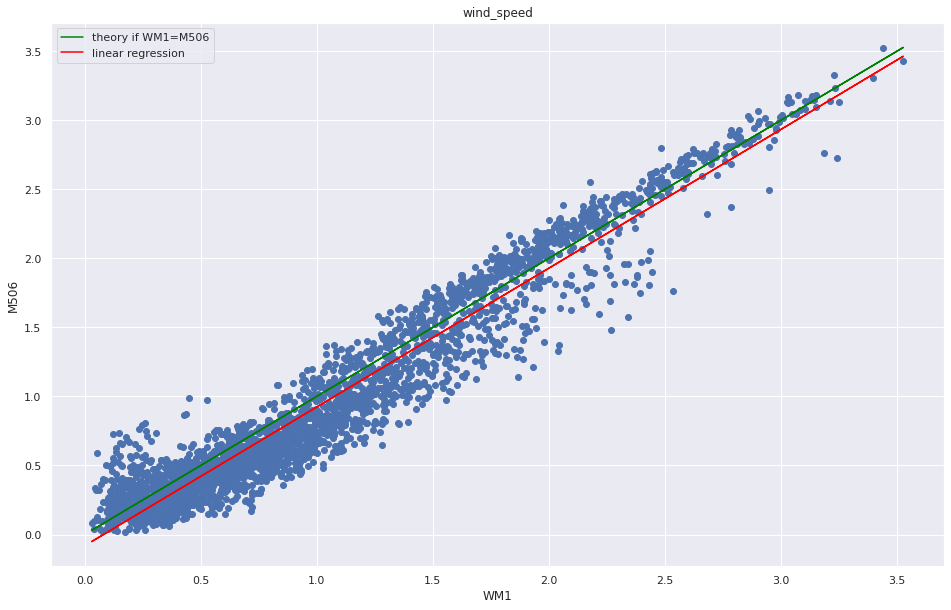

In [ ]:
plot_components_scatter([wm1, m6iv], ('wind_speed', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

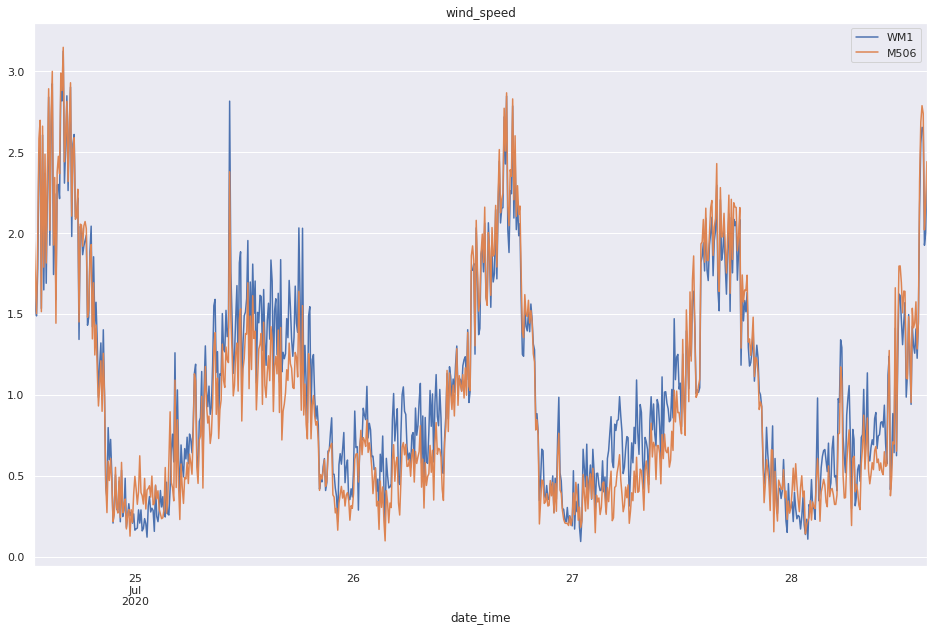

In [ ]:
plot_components(resample([wm1, m6iv], '8min'),('wind_speed', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## u

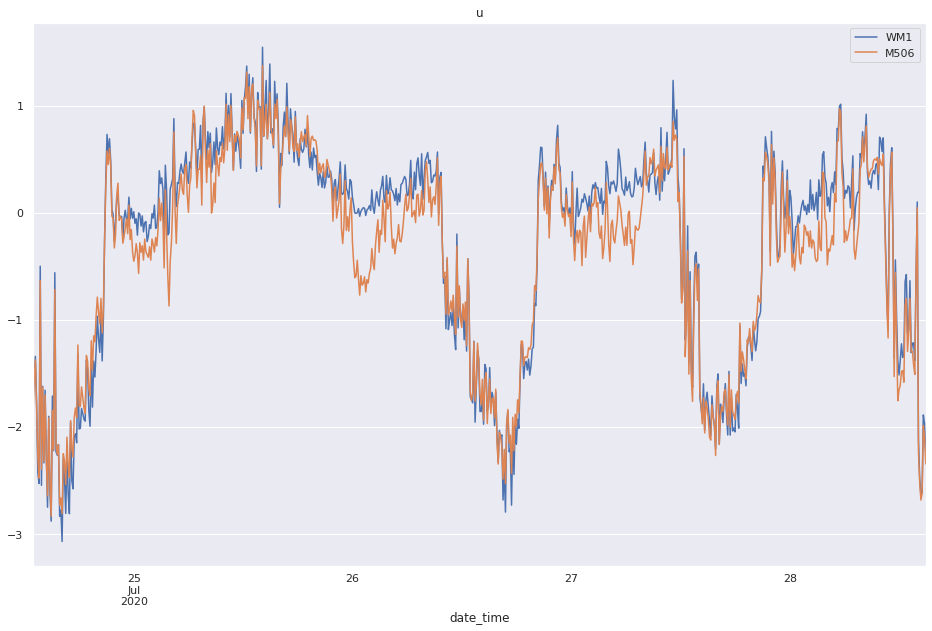

In [ ]:
plot_components(resample([wm1, m6iv], '8min'),('u', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

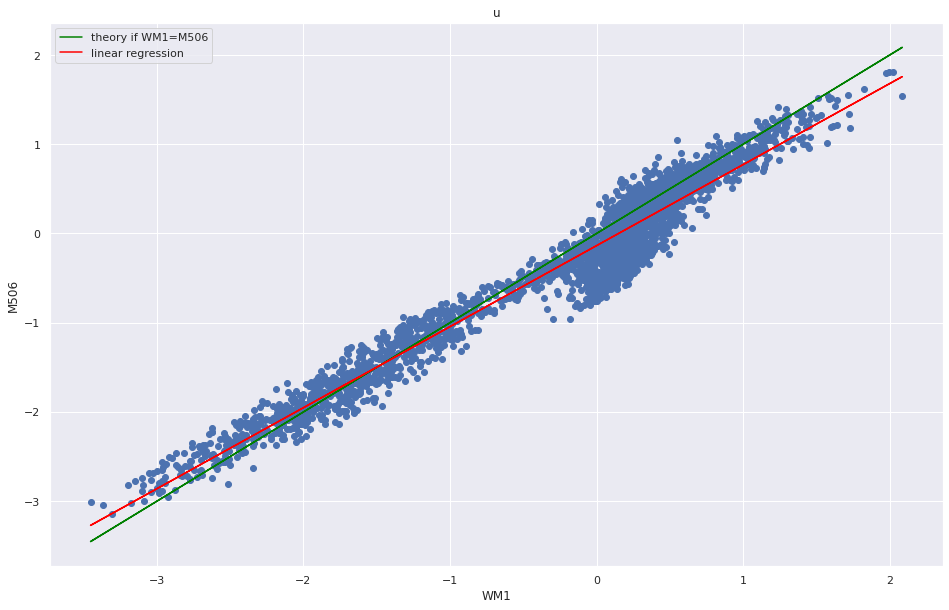

In [ ]:
plot_components_scatter([wm1, m6iv], ('u', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## v

Need to take into account that on the V direction is almost parallel to the mouting structure so there can be interference

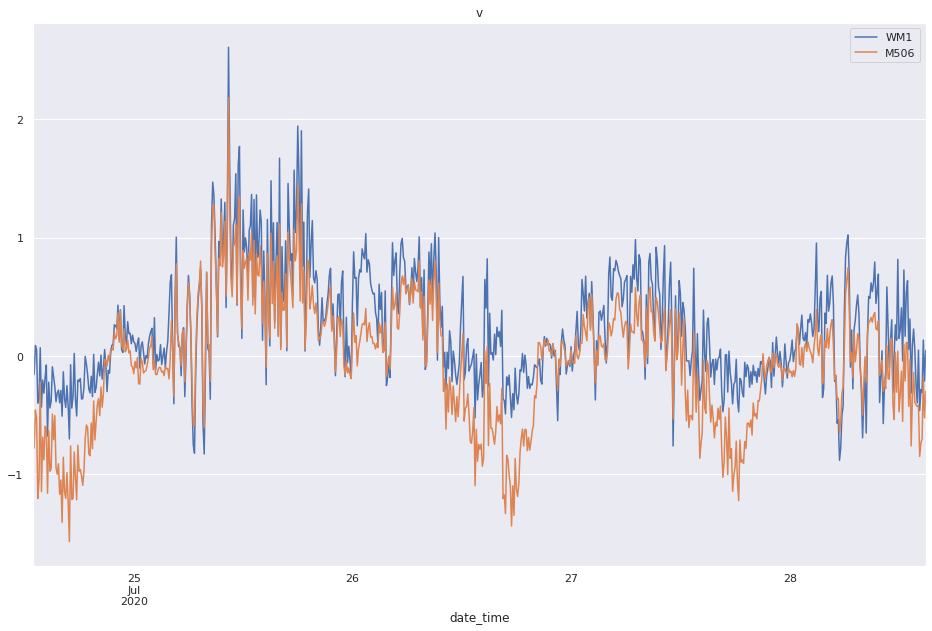

In [ ]:
plot_components(resample([wm1, m6iv], '8min'),('v', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

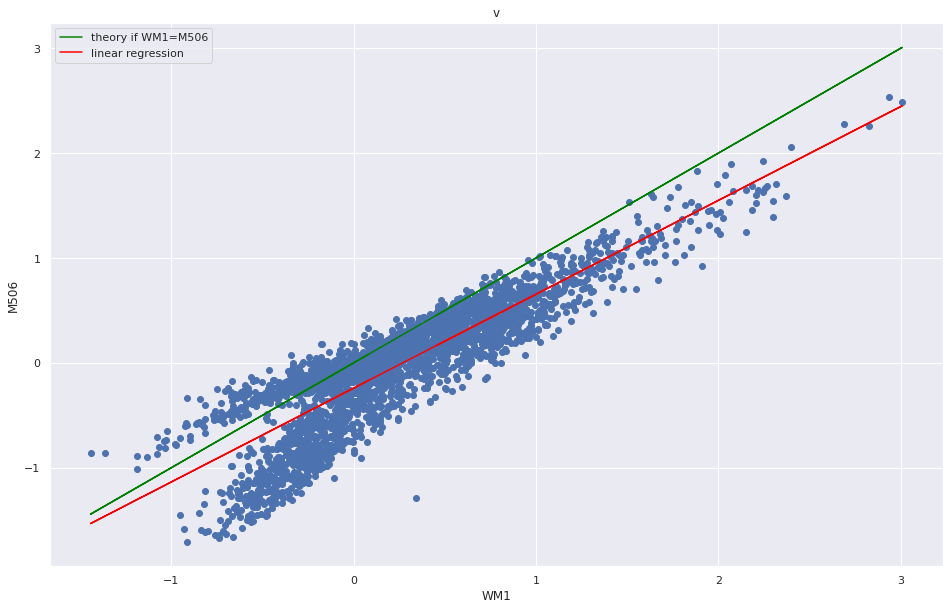

In [ ]:
plot_components_scatter([wm1, m6iv], ('v', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## w

can be worse but still rather bad

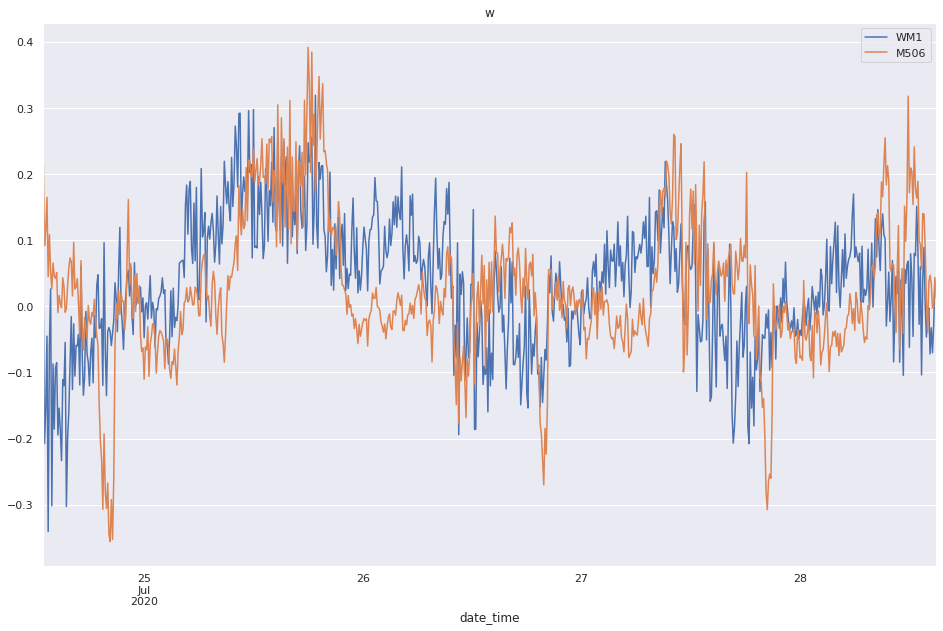

In [ ]:
plot_components(resample([wm1, m6iv], '8min'),('w', ), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

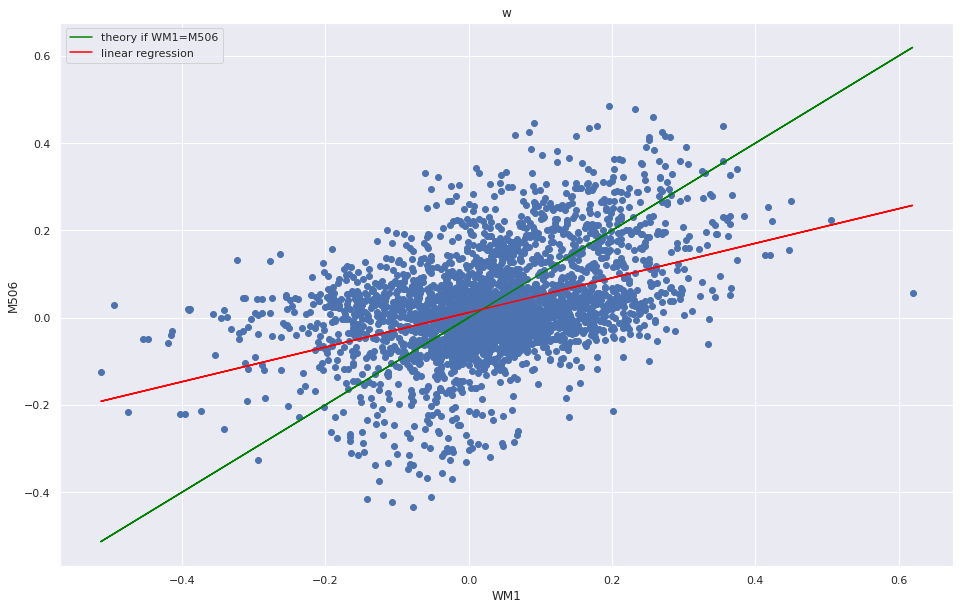

In [ ]:
plot_components_scatter([wm1, m6iv], ('w', ), figsize=(16,10), plot_info=[{'label': 'WM1'}, {'label': 'M506'}])

## But the Direction ...
looks bad :(

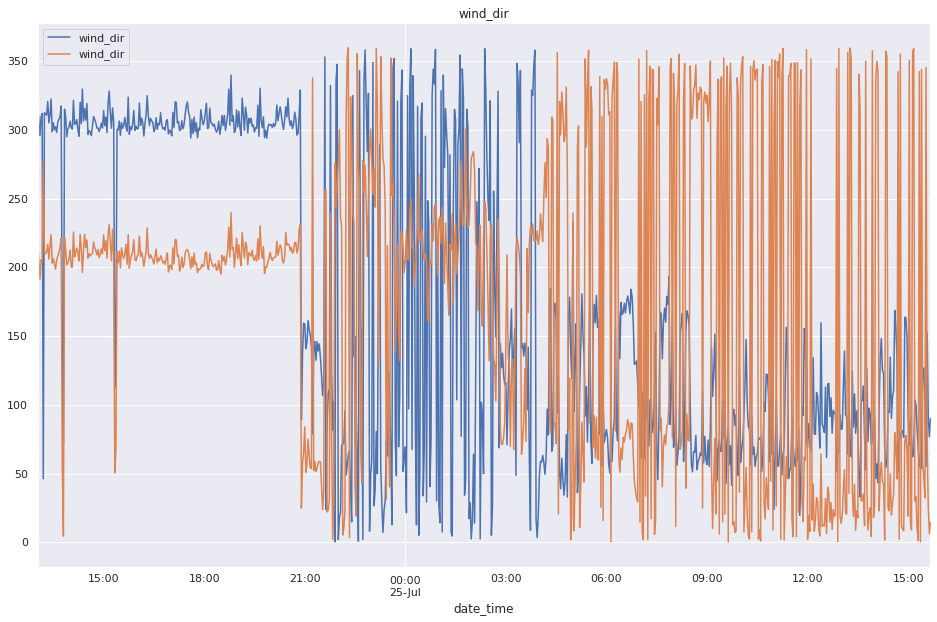

In [ ]:
plot_components([wm1[:800], m6iv[:800]], ('wind_dir',))

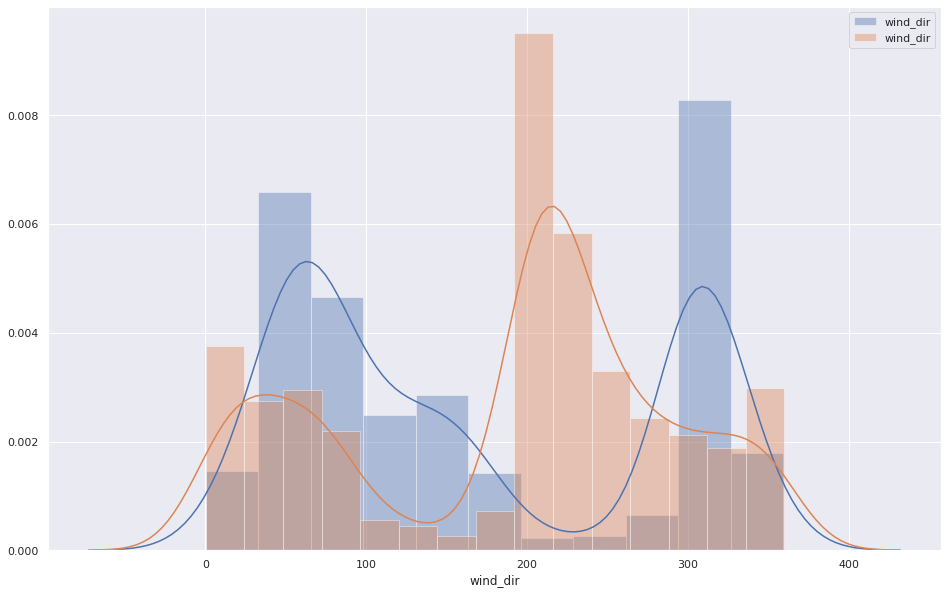

In [ ]:
plot_dist_comp([wm1, m6iv], ('wind_dir',))

## Just rotate by 27°

27° N is the rough average of the reading of the compass sensor on M506 (would love to know more about this sensor but there is nothing in the datasheet), while the estimated offset in the field with manual compass is 0° N, hence the idea to try to rotate by 27°.

TODO need to get a more exact number

**TODO** need to have better plots

In [ ]:
m6r = rotate_wind_ang(m6iv, 27)

In [ ]:
m6r = add_wind_dir(m6r) # recalc wind dir

**Warning** direction data cannot be resampled with normal mean

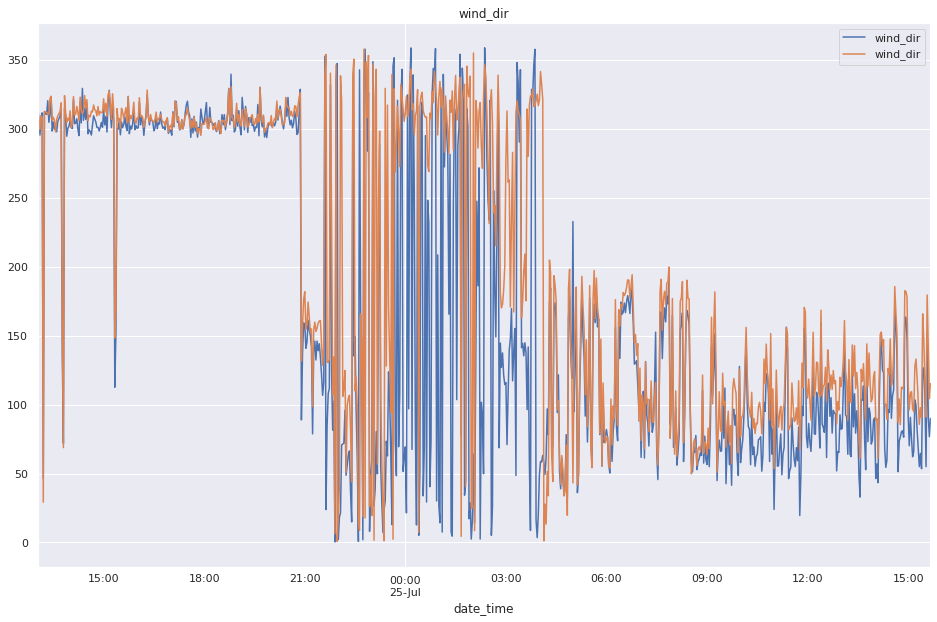

In [ ]:
plot_components([wm1[:800], m6r[:800]], ('wind_dir',))

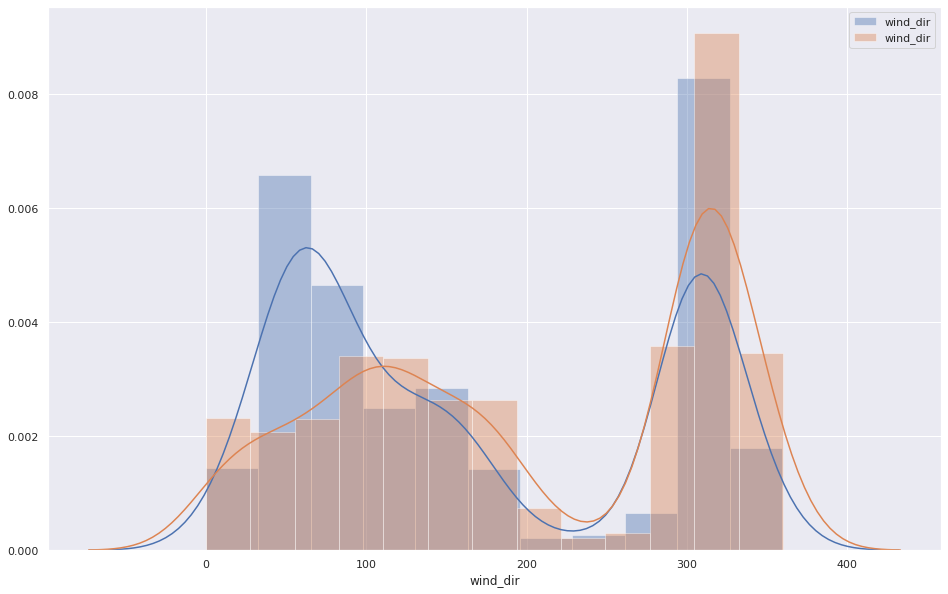

In [ ]:
plot_dist_comp([wm1, m6r], ('wind_dir',))

Ci siamooo ma... the v is way worse

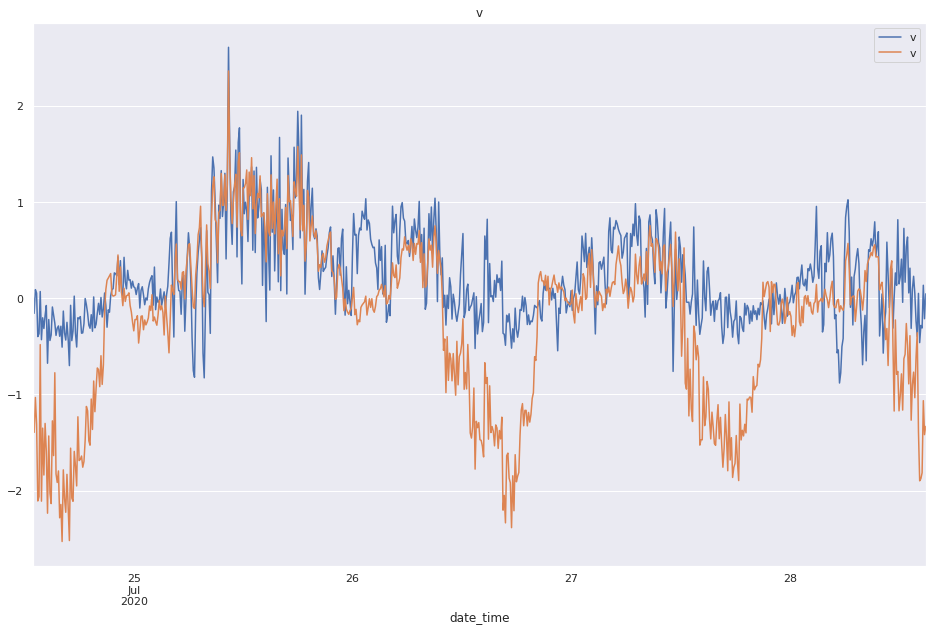

In [ ]:
plot_components(resample([wm1, m6r], '8min'), 'v')

# Conclusion

Overall this is what is seems what needs to be done:

- Invert the u
- Invert the v
- Rotate by 27° N